<h2>План работы</h2>
<ol>
    <li>Загрузить датасет video_games_sales.csv и изучить общую информацию о нем</li>
    <li>Выполнить проверку и предобработку данных</li>
    <li>Провести исследовательский анализ данных</li>
    <li>Сформулировать гипотезы и проверить их статистическими мтеодами</li>
    <li>Подготовить сводныпе выводы.</li>
    <li>Подготовить презентацию</li>
</ol>

## Подключение библиотек

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
from scipy import stats as st

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = [12, 8]

# 1. Загрузка и изучение общей информации о датасете

In [2]:
data = pd.read_csv('video_games_sales.csv')
data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


#### Описание данных
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* Publisher — издатель игры
* NA_sales — продажи в Северной Америке (в млн.)
* EU_sales — продажи в Европе (в млн.)
* JP_sales — продажи в Японии (в млн.)
* Other_sales — продажи в других странах (в млн.)
* Global_Sales - общие глобальные продажи (в млн.)
* Critic_Score — оценка критиков (по шкале от 0 до 100)
* Critic_Count — количество обзоров от критиков
* User_Score — оценка пользователей (по шкале от 0 до 10)
* User_Count — количество оценок от пользователей
* Developer — разработчик игры
* Rating — рейтинг от ESRB (Entertainment Software Rating Board)

Наблюдения:

* датасет содержит 16719 строк.
* Данные по каждой строке представлены в 16 колонках.
* Названия колонок представлены в различном стиле написания, что требует корректировки.
* Судя по разнице в числе ненулевых ячеек - некоторые колонки содержат пропуски.
* Год релиза и данные о числе пользователей представлены типом данных float, хотя по сути являются целочисленными.
* User_Score представлен типом данных object, хотя  рейтинг, вероятно, должен быть численным.

# 2. Проверка и предобработка данных

#### Приведем названия всех столбцов к нижнему регистру

In [4]:
data.columns = data.columns.str.lower()
data.columns.to_list()

['name',
 'platform',
 'year_of_release',
 'genre',
 'publisher',
 'na_sales',
 'eu_sales',
 'jp_sales',
 'other_sales',
 'global_sales',
 'critic_score',
 'critic_count',
 'user_score',
 'user_count',
 'developer',
 'rating']

#### Посмотрим пропуски

In [5]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
publisher            54
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
global_sales          0
critic_score       8582
critic_count       8582
user_score         6704
user_count         9129
developer          6623
rating             6769
dtype: int64

То же, но в относительном формате (% от общего числа):

In [6]:
data.isna().mean()*100

name                0.011962
platform            0.000000
year_of_release     1.608948
genre               0.011962
publisher           0.322986
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
global_sales        0.000000
critic_score       51.330821
critic_count       51.330821
user_score         40.098092
user_count         54.602548
developer          39.613613
rating             40.486871
dtype: float64

Пропуски в годе издания:

In [7]:
data.loc[data['year_of_release'].isna()]

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating
183,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23,94.0,29.0,8.5,140.0,EA Tiburon,E
377,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49,84.0,20.0,6.4,76.0,EA Canada,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.80,0.97,0.00,0.29,3.06,74.0,17.0,7.9,22.0,Traveller's Tales,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00,NaN,NaN,NaN,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16376,PDC World Championship Darts 2008,PSP,NaN,Sports,Oxygen Interactive,0.01,0.00,0.00,0.00,0.01,43.0,7.0,tbd,NaN,Oxygen Interactive,E10+
16409,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0.00,0.00,0.00,0.01,69.0,14.0,6.5,6.0,Midway,T
16452,Inversion,PC,NaN,Shooter,Namco Bandai Games,0.01,0.00,0.00,0.00,0.01,59.0,6.0,6.7,107.0,Saber Interactive,M
16462,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,Unknown,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


Попробуем достать часть годов из названия игры

In [8]:
def find_year(row):
    if np.isnan(row['year_of_release']):
        result = re.findall(r'\b(19[0-8][0-9]|2[01][0-9]{2})\b',row['name'])
        if result:
            result = result[0]
            return result
    return row['year_of_release']

data['year_of_release'] = data.apply(find_year, axis=1)

Остальные строки с пропусками данных о годе выпуска удалим. Заменять их средней или медианой нет особого смысла, т.к., во-первых, таких данных не много, а во-вторых замена года выпуска может исказить статистику при дальнейшем анализе.

In [9]:
data_old = data.copy() # создадим копию исходного датасета перед началом очистки

In [10]:
data = data.dropna(subset=['year_of_release'])

In [11]:
data.loc[data['name'].isna()]

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating
659,NaN,GEN,1993.0,NaN,Acclaim Entertainment,1.78,0.53,0.00,0.08,2.39,NaN,NaN,NaN,NaN,NaN,NaN
14246,NaN,GEN,1993.0,NaN,Acclaim Entertainment,0.00,0.00,0.03,0.00,0.03,NaN,NaN,NaN,NaN,NaN,NaN


Игры с неизвестным названием, жанром и рейтингами также вряд ли представляют интерес, поэтому удалим и их.

In [12]:
data = data.dropna(subset=['name'])

Есть также немного записей с отствующей инофрмацией об издателе и очень много строк с пропуском сведений о разработчике. Заменим такие пропуски на строковое значение 'Unknown'

In [13]:
data.loc[data['publisher'].isna(), 'publisher'] = 'Unknown'
data.loc[data['developer'].isna(), 'developer'] = 'Unknown'

Значения рейтинга тоже строковые, поэтому пропуски также заменим на "Unknown"

In [14]:
data.loc[data['rating'].isna(), 'rating'] = 'Unknown'

In [15]:
data['rating'].value_counts()

Unknown    6685
E          3931
T          2905
M          1537
E10+       1394
EC            8
K-A           3
AO            1
RP            1
Name: rating, dtype: int64

Больше чем в половине строк отсутствует информация о числе пользователей, проголосовавших за игру (user_count). Данные в этой колонке получается нерепрезентативными, поэтому вместо того, чтобы заменять пропуски - удалим просто эту колонку.


In [16]:
data = data.drop(['user_count'], axis=1)

In [17]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
publisher             0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
global_sales          0
critic_score       8470
critic_count       8470
user_score         6613
developer             0
rating                0
dtype: int64

Наблюдение: остались лишь пропуски в значениях оценок и рейтингов. Вряд ли их целесообрано на что-то менять, поэтому оставим как есть.

#### Преобразуем типы данных

In [18]:
data['year_of_release'] = data['year_of_release'].astype('int')

In [19]:
mask = data.loc[~data['user_score'].isna()]
mask = mask[~mask['user_score'].str.contains('[^a-zA-Z]')]
mask['user_score'].value_counts()

tbd    2379
Name: user_score, dtype: int64

Наблюдение: очевидно тип данных object в колонке year_of_release связан с наличием строковых данных tbd. Вероятнее всего, это означает "to be determined" - т.е., что значение будет рассчитано позже. Изучим подробнее данные, чтобы понять, есть ли какая-то связь данного параметра с другими параметрами

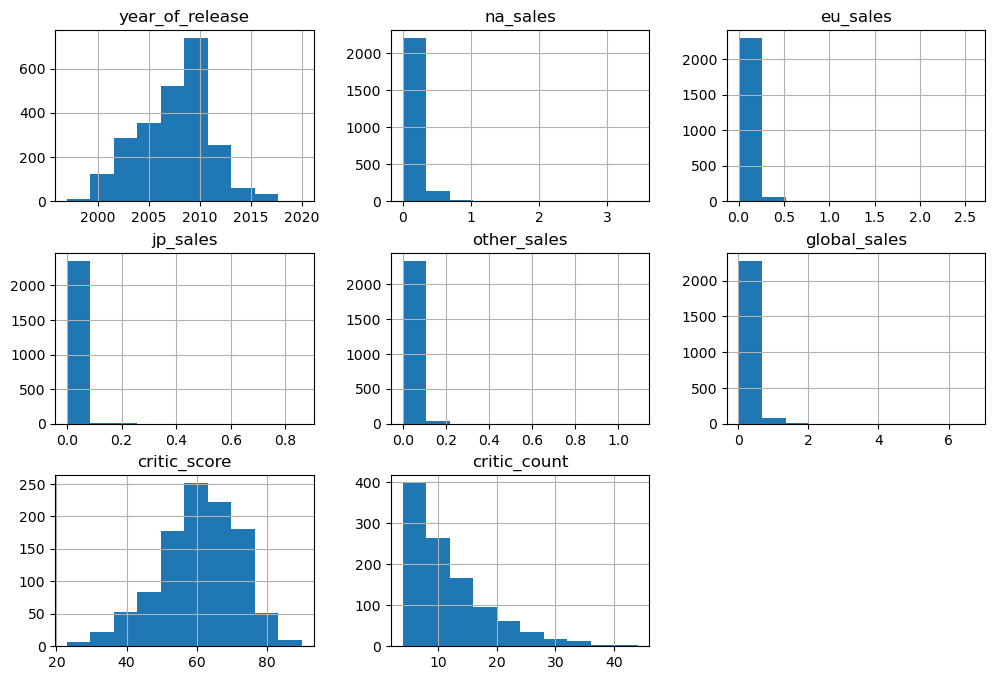

In [20]:
mask.hist()
plt.show()

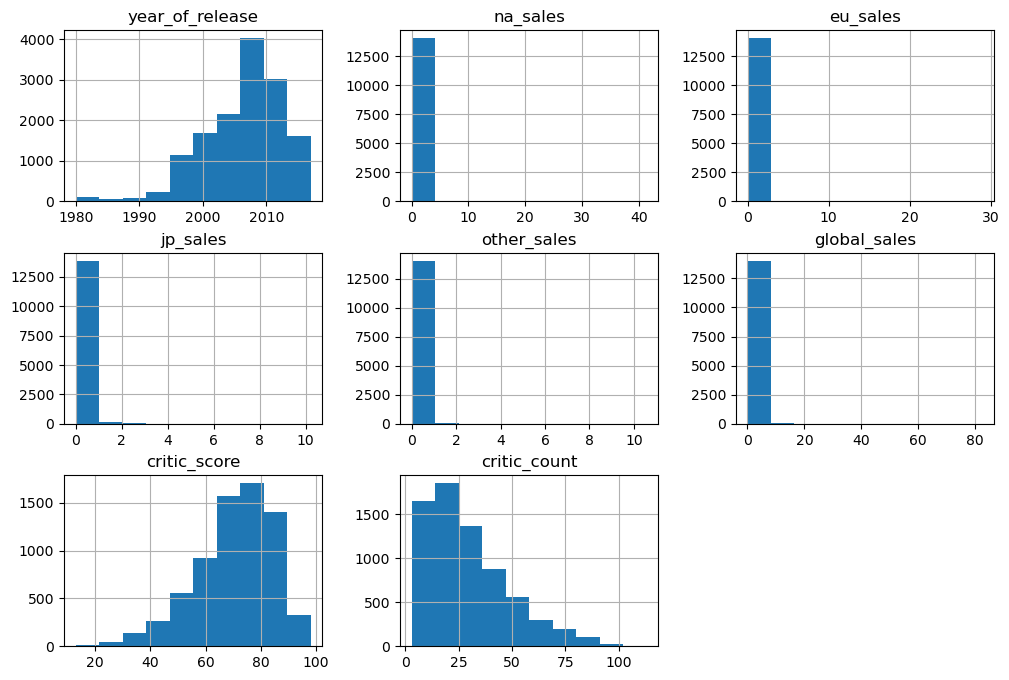

In [21]:
data.loc[data['user_score'] != 'tbd'].hist();

In [22]:
pivot = {}
for title in ['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'global_sales']:
    all_data = data.loc[data['user_score'] != 'tbd'][title].mean()
    tbd_data = mask[title].mean()
    pivot[title] = [all_data, tbd_data, round(all_data/tbd_data, 2)]
pivot = pd.DataFrame(pivot).T
pivot.columns = ['без tbd', 'только tbd', 'соотношение']
pivot

,без tbd,только tbd,соотношение
na_sales,0.287634,0.125582,2.29
eu_sales,0.163347,0.043682,3.74
jp_sales,0.091186,0.002778,32.82
other_sales,0.053028,0.015914,3.33
global_sales,0.595408,0.188453,3.16


Наблюдения:

- Сначала была мысль, что tbd присваивается играм, вышедшим недавно и которые еще не успели оценить. Но эта концепция не оправдалась, т.к. с tbd есть и много довольно старых игр. Это видно по гистограмам выше.
- Диапазон распределения продаж отличается на порядок для данных с tbd и без. Таблица выше показывает, что среднее число продаж игр с пользовательской оценкой tbd в зависимости от региона может быть до 32 раз меньше, чем в среднем для игр, имеющих оценку. Значит tbd связан с тем, что копий игры за все время продано недостаточно много и, соответственно, для них пока не хватает оценок для присвоения user_score

Таким образом, корректнее всего будет заменить tbd на пропуски, т.к. это, по сути, они и есть.

In [23]:
def change_tbd(row):
    if not np.isnan(row['critic_score']):
        if row['user_score'] == 'tbd':
            return np.nan
        else:
            return row['user_score']
    else:
        return np.nan
    
data['user_score'] = data.apply(change_tbd, axis=1)

Теперь можно заменить тип данных на корректный (float)

In [24]:
data['user_score'] = data['user_score'].astype('float')

#### Проверим данные на наличие дубликатов

In [25]:
data.duplicated().sum()

0

Наблюдение: полных дубликатов нет

In [26]:
data['name'].duplicated().sum()

5030

Наблюдение: есть дубликаты в названиях игр. Но одно и те же игры могут выходить для разных платформ. Проверим эту гипотезу:

In [27]:
data[['name', 'platform']].duplicated().sum()

3

In [28]:
data[data[['name', 'platform']].duplicated()]

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,developer,rating
1591,Need for Speed: Most Wanted,X360,2005,Racing,Electronic Arts,1.0,0.13,0.02,0.10,1.25,83.0,54.0,8.5,EA Canada,T
11716,Need for Speed: Most Wanted,PC,2012,Racing,Electronic Arts,0.0,0.06,0.00,0.02,0.08,82.0,19.0,8.5,Black Box,T
16233,Madden NFL 13,PS3,2012,Sports,Electronic Arts,0.0,0.01,0.00,0.00,0.01,83.0,22.0,5.5,EA Tiburon,E


In [29]:
display(data.loc[(data['name'] == 'Need for Speed: Most Wanted') & (data['platform'] == 'X360')])
display(data.loc[(data['name'] == 'Need for Speed: Most Wanted') & (data['platform'] == 'PC')])
display(data.loc[(data['name'] == 'Madden NFL 13') & (data['platform'] == 'PS3')])

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,developer,rating
1190,Need for Speed: Most Wanted,X360,2012,Racing,Electronic Arts,0.62,0.78,0.01,0.15,1.56,83.0,54.0,8.5,EA Canada,T
1591,Need for Speed: Most Wanted,X360,2005,Racing,Electronic Arts,1.00,0.13,0.02,0.10,1.25,83.0,54.0,8.5,EA Canada,T


,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,developer,rating
5973,Need for Speed: Most Wanted,PC,2005,Racing,Electronic Arts,0.02,0.23,0.0,0.04,0.29,82.0,19.0,8.5,Black Box,T
11716,Need for Speed: Most Wanted,PC,2012,Racing,Electronic Arts,0.00,0.06,0.0,0.02,0.08,82.0,19.0,8.5,Black Box,T


,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,developer,rating
604,Madden NFL 13,PS3,2012,Sports,Electronic Arts,2.11,0.22,0.0,0.23,2.56,83.0,22.0,5.5,EA Tiburon,E
16233,Madden NFL 13,PS3,2012,Sports,Electronic Arts,0.00,0.01,0.0,0.00,0.01,83.0,22.0,5.5,EA Tiburon,E


Наблюдение: все так, как мы и предполагали. Пожалуй, только Madden NFL 13 действительно является дубликатом. Вряд ли один дубликат может повлиять на общую картину, но раз мы его нашли - удалим.

In [30]:
data = data.drop(index=16233)

Считаем общие потери данных на этапе предобработки:

In [31]:
print(data_old.shape, data.shape)
print('Потеряно данных:', '{0:.2%}'.format(1 - data.shape[0]/data_old.shape[0]))

(16719, 16) (16464, 15)
Потеряно данных: 1.53%


# 3. Исследовательский анализ данных

#### Выпуск игр по годам

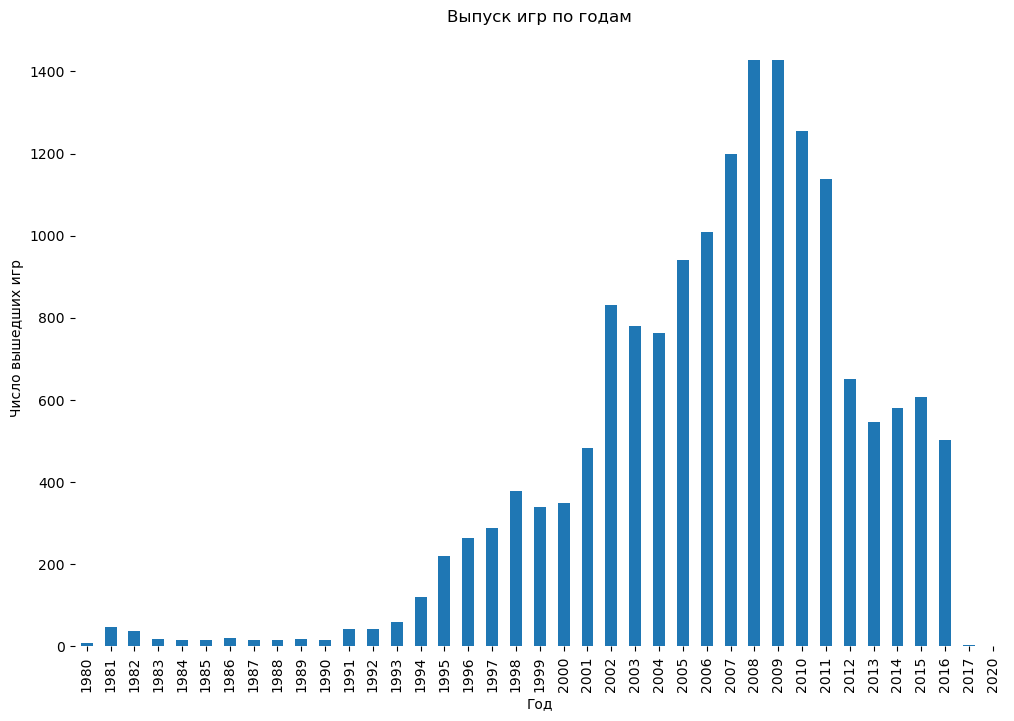

In [32]:
pd.pivot_table(data, index='year_of_release', values='name', aggfunc='count').plot(kind='bar', legend=None)
plt.title('Выпуск игр по годам')
plt.xlabel('Год')
plt.ylabel('Число вышедших игр')
plt.box(False)
plt.show()

Наблюдение: все данные важны, но очевидно, что рассвет игровой индустрии приходится на конец 90-х - нулевые года. Примерно в 2012 происходит другой переломный момент - игр начинают выпускать заметно меньше.

In [33]:
def top_platform_stats(data, n=5):
    top_platforms = pd.pivot_table(data, index=['platform'], aggfunc='sum').sort_values(by='global_sales', ascending=False).index.to_list()
    plt.figure()
    plt.title('Платформы')
    for platform in top_platforms[:n]:
        mask = data.loc[data['platform'] == platform]
        mask = pd.pivot_table(mask, index='year_of_release', values='global_sales', aggfunc='sum')
        plt.plot(mask, label=platform)

    plt.legend()
    plt.xlabel('Год')
    plt.ylabel('Глобальные продажи')
    rank = range(data['year_of_release'].min(), data['year_of_release'].max()+1)
    if len(rank) > 10:
        plt.xticks(rotation = 90)
    plt.xticks(rank)
    plt.box(False)
    plt.show()    

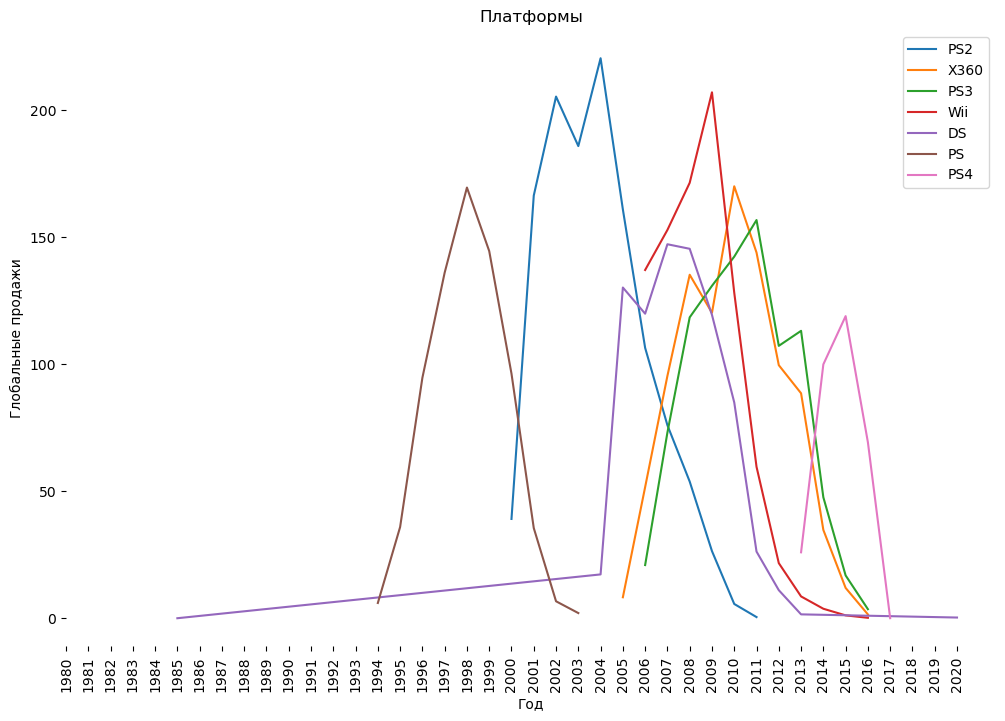

In [34]:
top_platform_stats(data, 7)

Наблюдение: судя по графику примерно до 2006 года жизненный цикл платформ был порядка 10 лет и в рамках него одни платформы плавно вытесняли с рынка другие. Однако потом платформы стали более активно конкурировать друг с другом - их стало больше в единый момент времени и они начали более агрессивно делить между собой пользователей. Например, в 2010 году совпадают пики популярности платформ X360 и PS3

### Определим актуальный период для дальнейшего более детального анализа

Нет смысла проводить анализ на совсем старых данных, т.к. там доминируют уже неактуальные на текущий момент платформы. За последние годы данных вообще нет, поэтому этот период учитывать также нет смысла. В качестве актуального периода возбмем 2013-2016 гг., то есть данные после уменьшения числа ежегодно выпускаемых игр и там, где практически отствуют продажи игр для устаревших платформ.

In [35]:
actual_data = data.loc[(data['year_of_release'] > 2012) & (data['year_of_release'] < 2017)]
actual_data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score
count,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,992.000000,992.000000,977.000000
mean,2014.476723,0.195958,0.175685,0.063017,0.053720,0.488474,72.037298,30.587702,6.740839
std,1.089643,0.547615,0.512338,0.233949,0.165656,1.234771,12.842507,23.134721,1.500751
min,2013.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,1.000000
25%,2014.000000,0.000000,0.000000,0.000000,0.000000,0.032500,66.000000,12.000000,6.000000
50%,2014.000000,0.020000,0.030000,0.010000,0.010000,0.110000,74.000000,24.000000,7.100000
75%,2015.000000,0.150000,0.130000,0.050000,0.040000,0.400000,81.000000,44.000000,7.900000
max,2016.000000,9.660000,9.090000,4.350000,3.960000,21.040000,97.000000,113.000000,9.300000


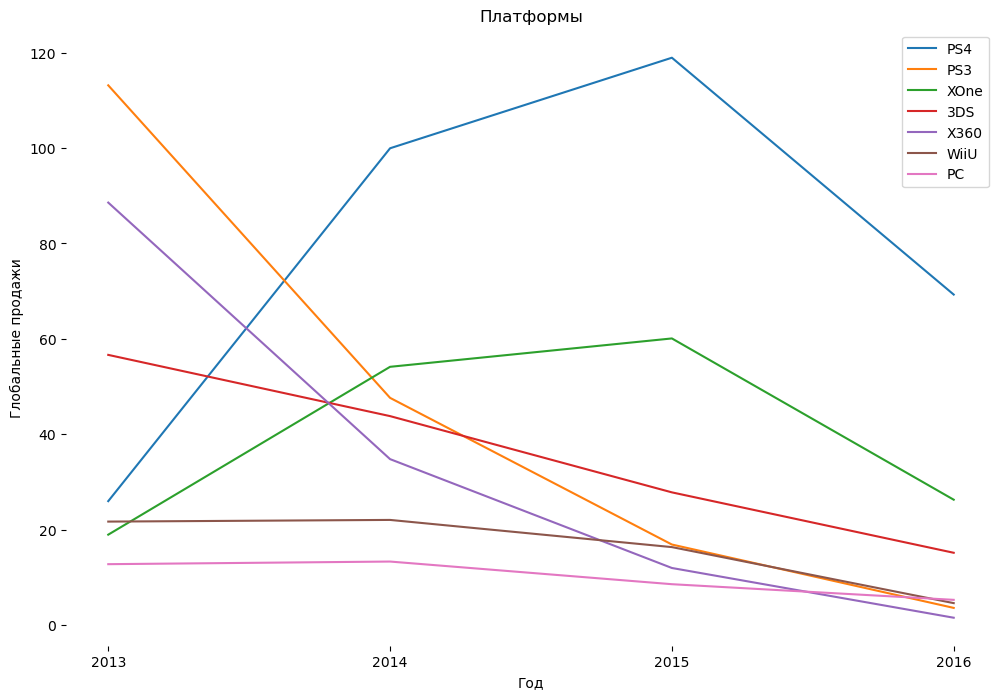

In [36]:
top_platform_stats(actual_data, 7)

Наблюдение: в актуальный период доминируют по продажам платформы PS4 и XOne. Продажи по ним также растут (если не учитывать последний 2016 год, где, вероятно, также представлены неполные данные). Прошлые модели этих платформ PS3 и X360 уходят с рынка. Доля PC и WiiU невелика, но относительно стабильна.

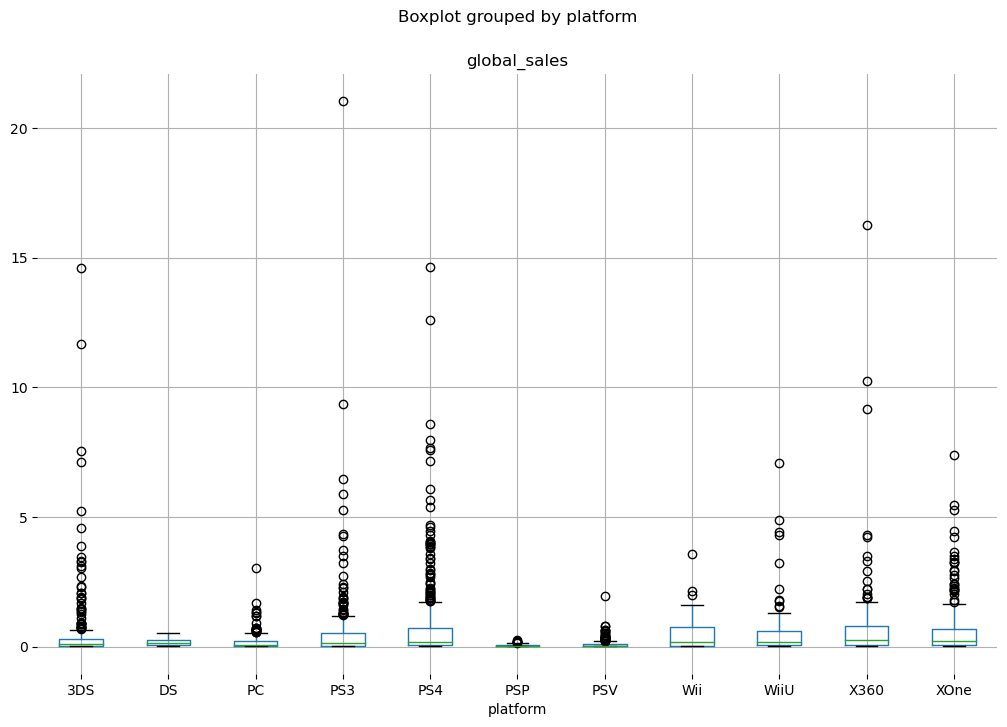

In [37]:
actual_data.boxplot('global_sales', by='platform')
plt.box(False)
plt.show()

Обрежем совсем дальние выбросы для наглядности:

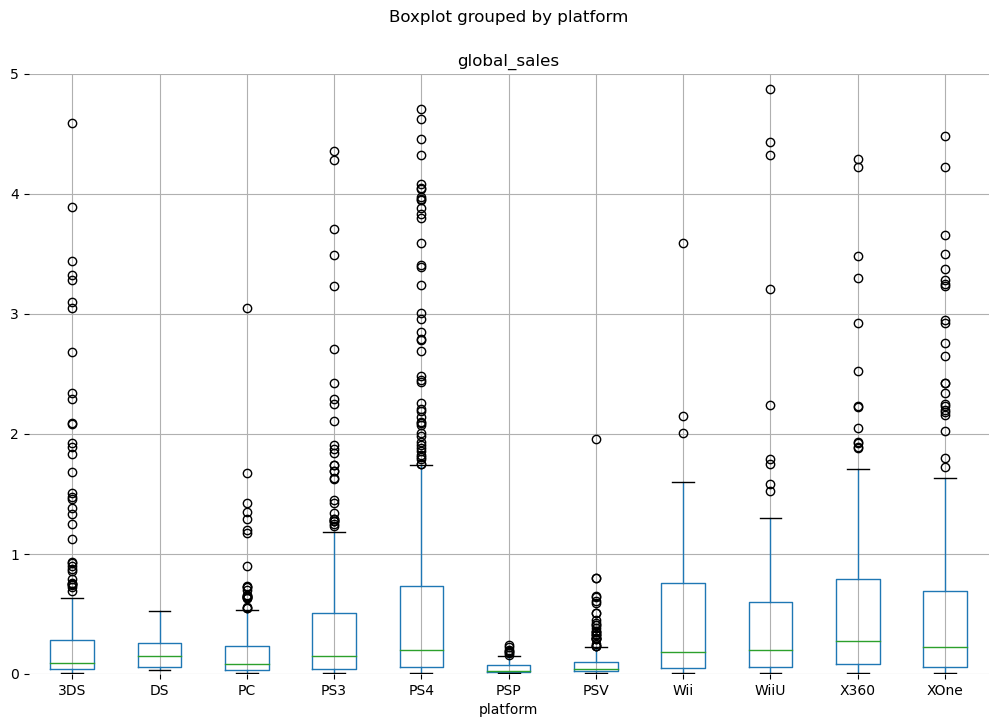

In [38]:
actual_data.boxplot('global_sales', by='platform')
plt.ylim(0,5)
plt.box(False)
plt.show()

Наблюдение: очень большие выбросы в зоне больших объемов продаж наблюдаются для платформы 3DS. Также непропорционально большие продажи заметры для платформы PS4 и X360

#### Воаимосвязь продаж и оценок

In [39]:
popular = pd.pivot_table(actual_data, index=['platform'], values='name', aggfunc='count').sort_values(by='name', ascending=False)
popular

,name
platform,
PS4,392
PSV,358
PS3,345
3DS,303
XOne,247
PC,190
X360,186
WiiU,115
PSP,67


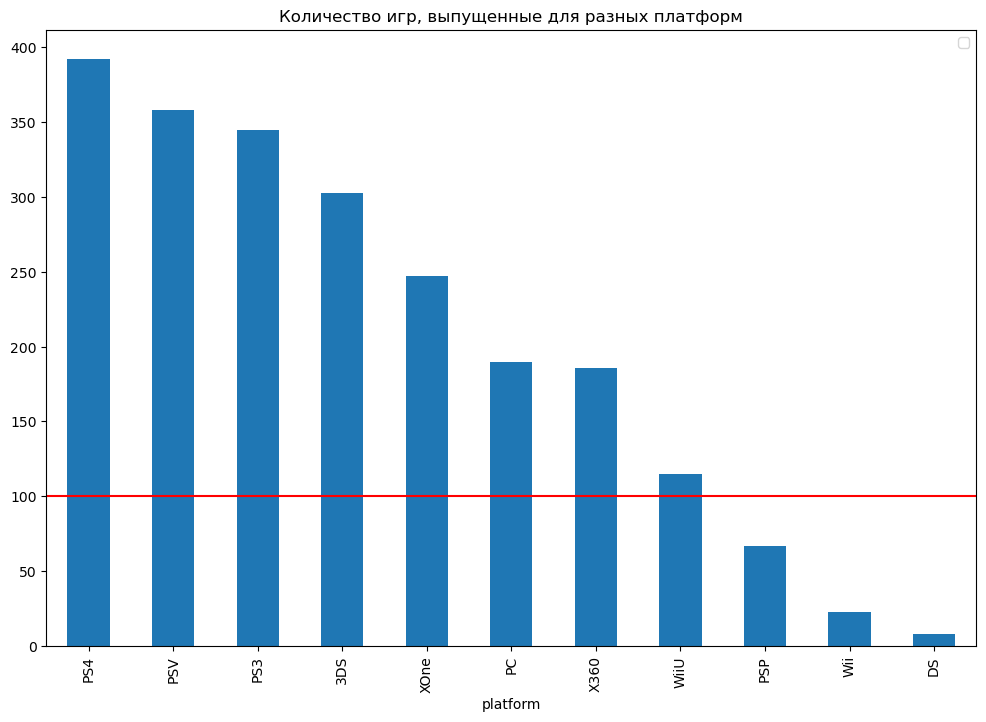

In [40]:
popular.plot(kind='bar')
plt.axhline(y = 100, color = 'r', linestyle = '-')
plt.legend('')
plt.title('Количество игр, выпущенные для разных платформ')
plt.show()

Уберем последние наименее популярные платформы, где меньше 100 игр, и проанализируем взаимосвязь продаж и отзывов с учетом параметра корреляции:

3DS


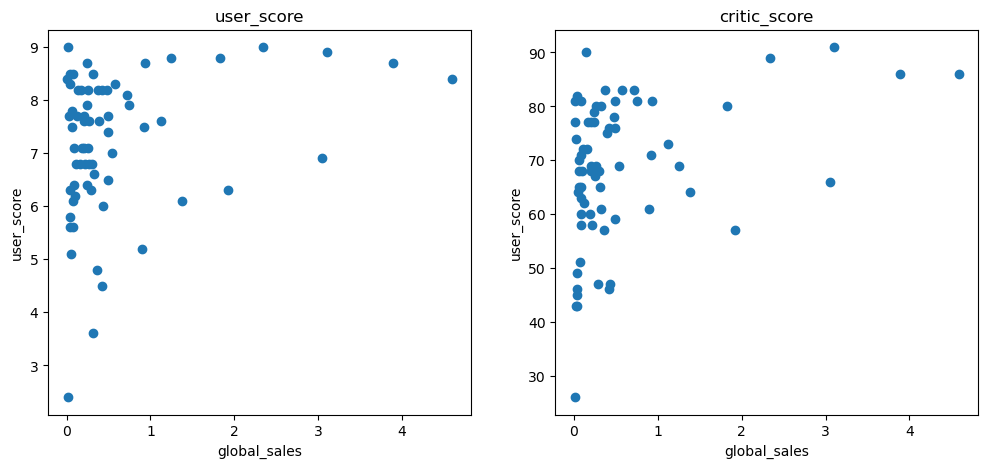

Корреляция global_sales и user_score: 0.27161213942026774
Корреляция global_sales и critic_score: 0.3553088249002951

************************************************************
PC


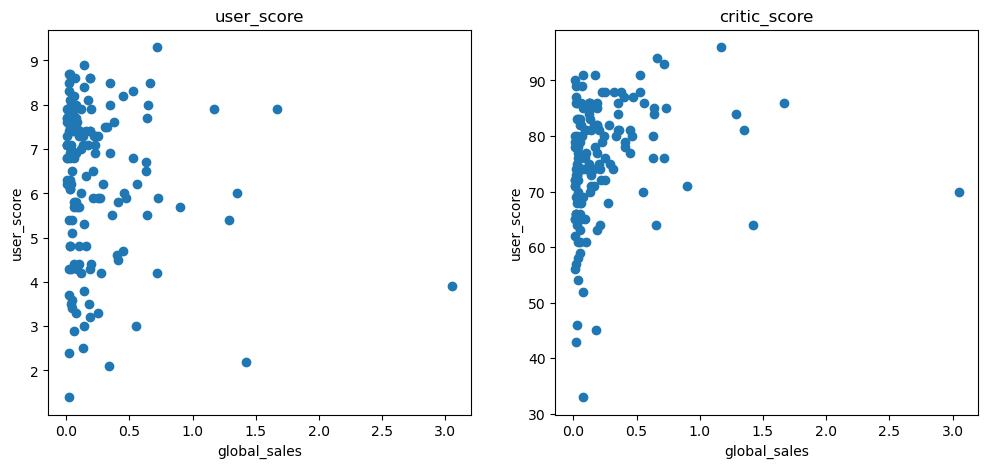

Корреляция global_sales и user_score: -0.10448708874556673
Корреляция global_sales и critic_score: 0.19739401350021293

************************************************************
PS3


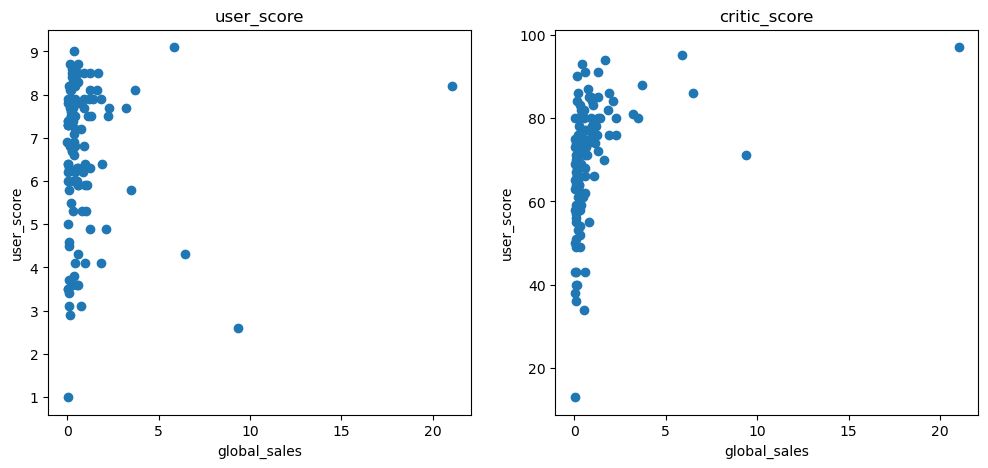

Корреляция global_sales и user_score: 0.02230961112093278
Корреляция global_sales и critic_score: 0.3342317009224377

************************************************************
PS4


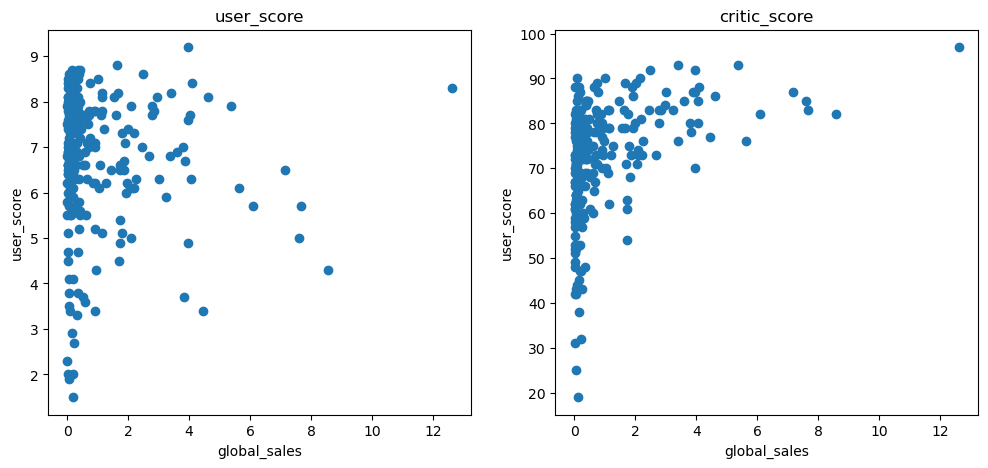

Корреляция global_sales и user_score: -0.03368717117009641
Корреляция global_sales и critic_score: 0.40684629341918926

************************************************************
PSV


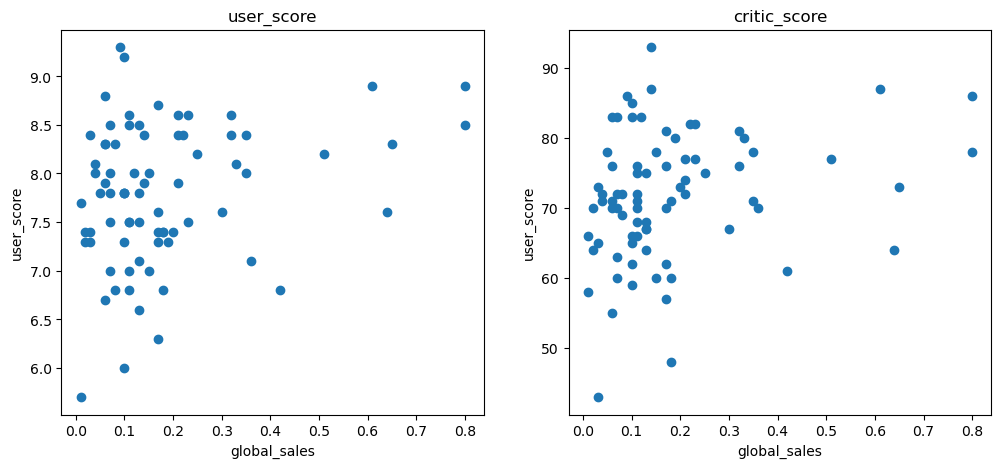

Корреляция global_sales и user_score: 0.26640254892665594
Корреляция global_sales и critic_score: 0.2548768085719995

************************************************************
WiiU


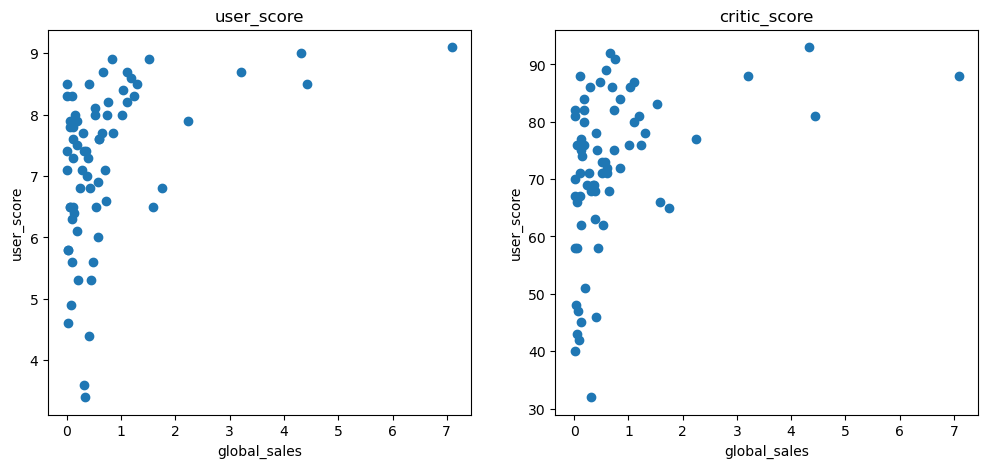

Корреляция global_sales и user_score: 0.40930013102834745
Корреляция global_sales и critic_score: 0.3766879738717037

************************************************************
X360


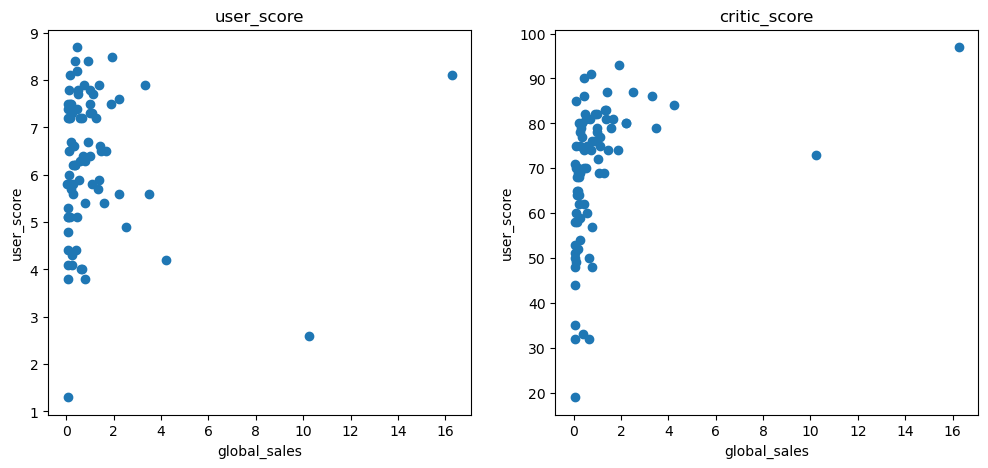

Корреляция global_sales и user_score: -0.006520090779311636
Корреляция global_sales и critic_score: 0.3499363514442567

************************************************************
XOne


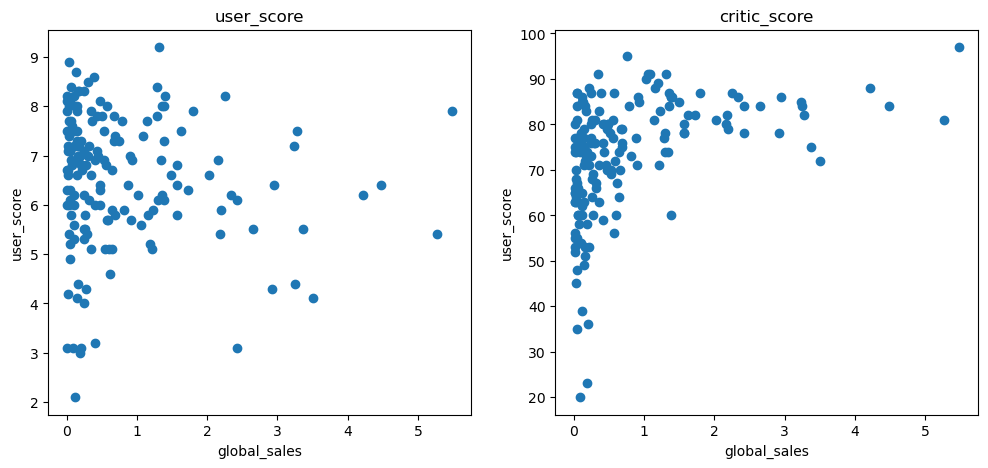

Корреляция global_sales и user_score: -0.09376658926899437
Корреляция global_sales и critic_score: 0.4173268527210658

************************************************************


In [41]:
for group_name, group in actual_data.loc[actual_data['platform'].isin(popular.index.tolist()[:-3])].groupby(by='platform'):
    print(group_name)
    fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
    x = group['global_sales']
    y1 = group['user_score']
    y2 = group['critic_score']
    ax1.scatter(x=x, y=y1)
    ax2.scatter(x=x, y=y2)
    ax1.set_xlabel('global_sales')
    ax1.set_ylabel('user_score')
    ax1.set_title('user_score')
    ax2.set_xlabel('global_sales')
    ax2.set_ylabel('user_score')
    ax2.set_title('critic_score')
    plt.show()
    print('Корреляция global_sales и user_score:', x.corr(y1))
    print('Корреляция global_sales и critic_score:', x.corr(y2))
    print()
    print(60*'*')

Наблюдение: Если смотреть на графики, то в целом заметно, что хорошо продающиеся игры обычно имеют более успешные оценки, а плохо продающиеся игры могут иметь очень плохие оценки и от пользователей и от критиков. Поэтому на графиках правый нижний угол обычно пустой, а левый нет. Также заметна интересная особенность: критики почти не ставят низкие оценки коммерчески успешным играм, а то время как для пользователей это гораздо более частая история. Это также видно при оценке корреляции: корреляция между продажами и оценкой критиков обычно выше чем корреляция между продажами и оценкой пользователей. При этом для менее популярных платформ (3DS, PSV, WiiU) этот эффект почти не проявляется, а для наболее популярных платформ (PS4 и XOne) он очень характерен: оценки пользователей здесь вообще не коррелируют с объемами продаж игр, в то время как оценки критиков имеют значительную положительную корреляцию.

#### Посмотрим кто производит самые популярные и коммерчески успешные игры

In [42]:
def make_sorter(l):
    sort_order = {k:v for k,v in zip(l, range(len(l)))}
    return lambda s: s.map(lambda x: sort_order[x])

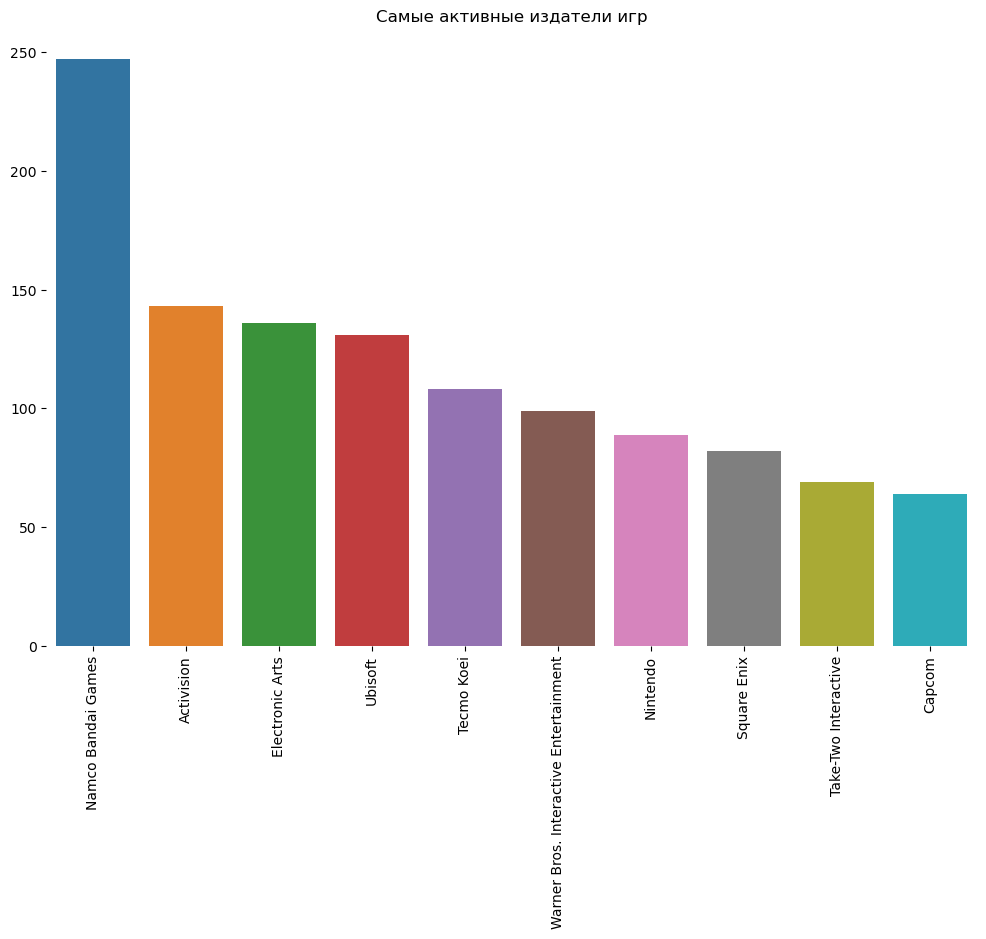

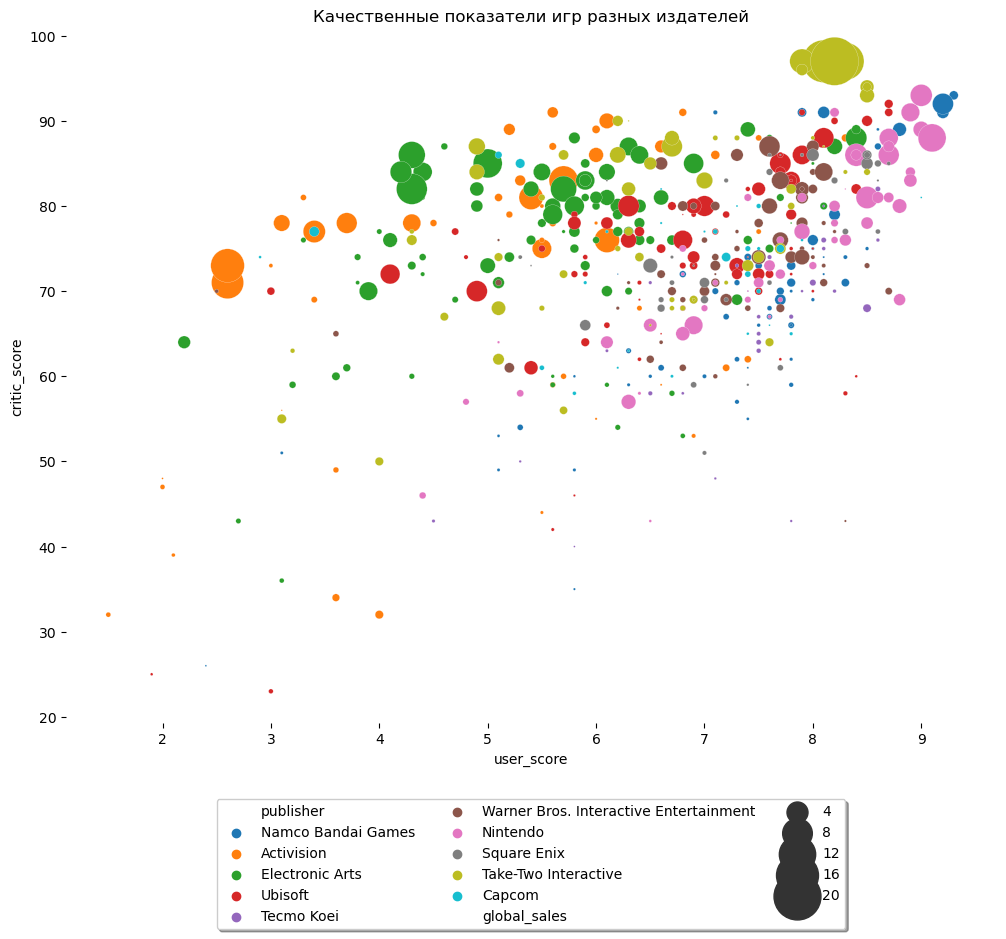

In [43]:
top_count = 10 # топ X компаний по числу выпущенных игр за актуальный период

pivot = pd.pivot_table(actual_data, index='publisher',
                        values='name', aggfunc='count').sort_values(by='name', ascending=False)[:top_count]

mask = actual_data.loc[actual_data['publisher'].isin(pivot.index)]
mask = mask.sort_values(by='publisher', key=make_sorter(pivot.reset_index()['publisher']))

fig, axes = plt.subplots()
sns.barplot(x=pivot.reset_index()['publisher'], y=pivot.reset_index()['name'], palette="tab10")
plt.box(False)
plt.xticks(rotation = 90)
plt.title('Самые активные издатели игр')
plt.xlabel('')
plt.ylabel('')
plt.show()


fig, axes = plt.subplots(figsize=(12,9))
sns.scatterplot(ax=axes, data=mask, x='user_score', y='critic_score',
                hue='publisher', size='global_sales', sizes=(1, 1200), palette="tab10")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10),
          fancybox=True, shadow=True, ncol=3)

plt.box(False)
plt.title('Качественные показатели игр разных издателей')
plt.show()

Размер кружков характеризует объемы продаж игры в мире, а разные издатели выделены разными цветами. Здесь видны интересные взаимосвязи коммерческой успешности (объемов продаж) игр с отзывами по разным издателям, которые расписаны более подробно в итоговых выводах.

#### Взаимосвязь продаж и жанров

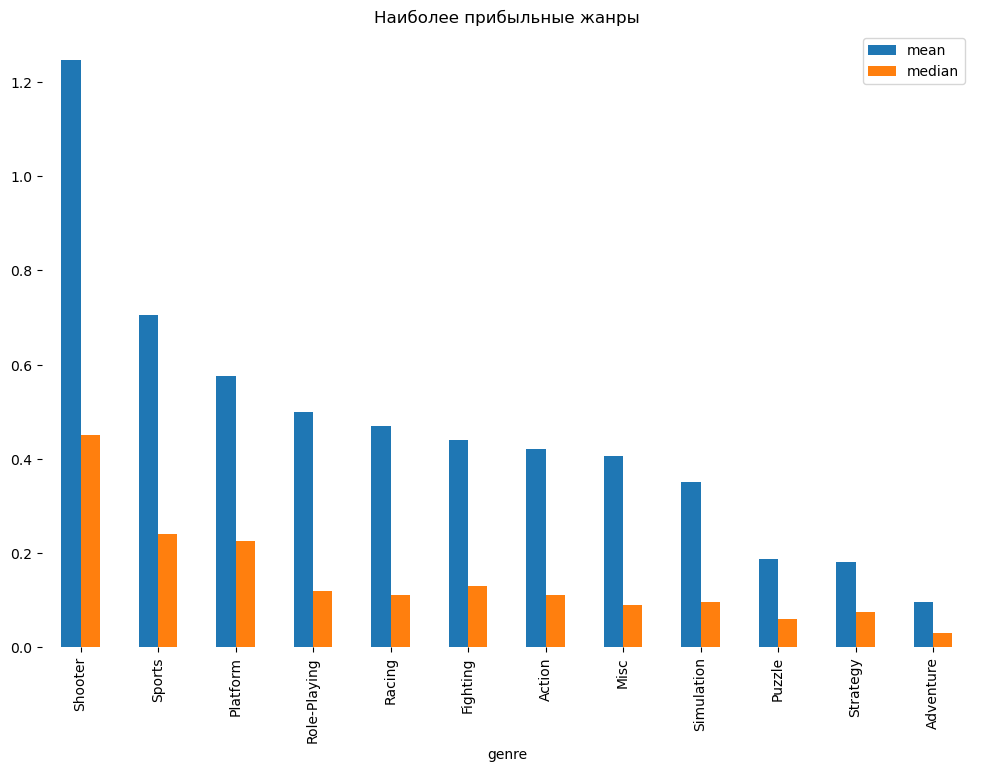

In [44]:
pivot_table = pd.pivot_table(actual_data, index='genre', values='global_sales', aggfunc=['mean', 'median'])
pivot_table.columns = ['mean', 'median']
pivot_table.sort_values(by='mean', ascending=False).plot(kind='bar', title='Наиболее прибыльные жанры')
plt.box(False)
plt.show()

наблюдение: диаграмма выше показывает среднее и меианное значение общих продаж по жанрам. Заметно, что ранжирование и по среднему значению и по медиане дает похожее распределение (за исключением некоторых отличий в конце списка). Наиболее прибыльными жанрами являются жанры Shooter, Sports, Platform. Наименее прибыльными: Adventure, Strategy, Puzzle

#### Изучим пользователей по регионам

In [45]:
def table_by_region(index):
    global actual_data
    region_sales = {}
    for sales in ['na_sales', 'eu_sales', 'jp_sales','other_sales']:
        pivot = pd.pivot_table(actual_data, index=[index], values=[sales], aggfunc='sum')
        region_sales[sales] = pivot
    table_region = concat_table(region_sales)
    return table_region    

def concat_table(table):
    for key, value in table.items():
        if key == list(table.keys())[0]:
            new_table = value
        else:
            new_table = pd.concat([new_table, value], axis=1)
    return new_table

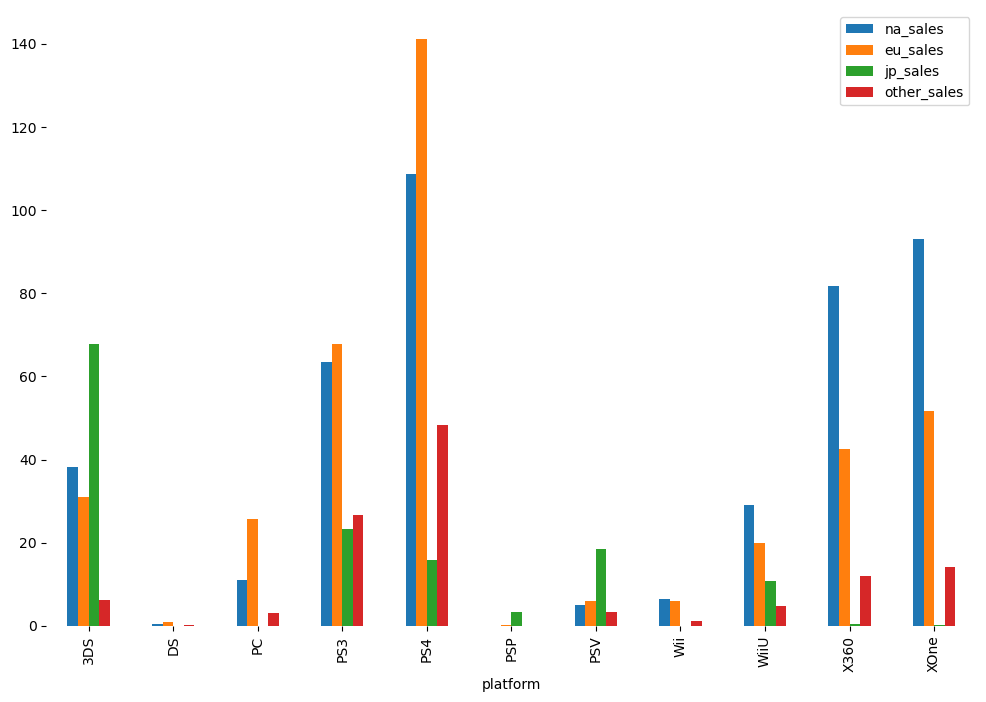

Наблюдение:
топ наиболее популярных платформ в регионе na : PS4, XOne, X360, PS3, 3DS
топ наиболее популярных платформ в регионе eu : PS4, PS3, XOne, X360, 3DS
топ наиболее популярных платформ в регионе jp : 3DS, PS3, PSV, PS4, WiiU
топ наиболее популярных платформ в регионе other : PS4, PS3, XOne, X360, 3DS


In [46]:
table_platform = table_by_region('platform')
table_platform.plot(kind='bar')
plt.box(False)
plt.show()

print('Наблюдение:')
for column in table_platform.columns:
    print('топ наиболее популярных платформ в регионе', column.split('_')[0], ':',
          ', '.join(table_platform[column].sort_values(ascending=False).index.to_list()[:5]))

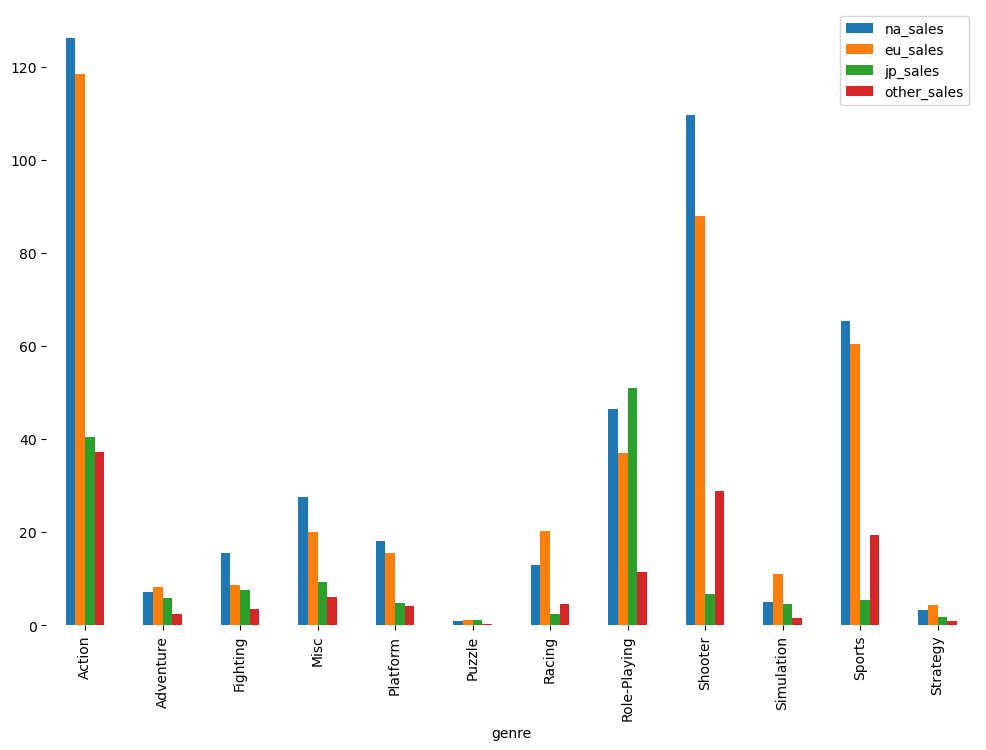

Наблюдение:
топ наиболее популярных жанров в регионе na : Action, Shooter, Sports, Role-Playing, Misc
топ наиболее популярных жанров в регионе eu : Action, Shooter, Sports, Role-Playing, Racing
топ наиболее популярных жанров в регионе jp : Role-Playing, Action, Misc, Fighting, Shooter
топ наиболее популярных жанров в регионе other : Action, Shooter, Sports, Role-Playing, Misc


In [47]:
table_genre = table_by_region('genre')
table_genre.plot(kind='bar')
plt.box(False)
plt.show()

print('Наблюдение:')
for column in table_genre.columns:
    print('топ наиболее популярных жанров в регионе', column.split('_')[0], ':',
          ', '.join(table_genre[column].sort_values(ascending=False).index.to_list()[:5]))

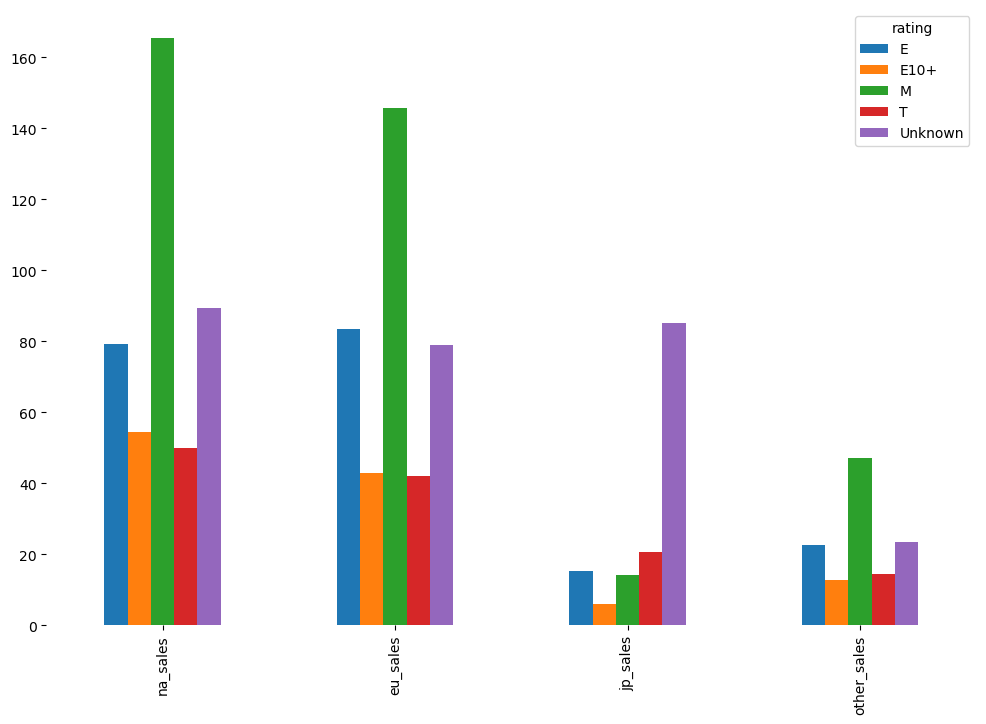

Наблюдение:
топ наиболее продаваемых игр в регионе na по рейтингу ESRB : M, Unknown, E, E10+, T
топ наиболее продаваемых игр в регионе eu по рейтингу ESRB : M, E, Unknown, E10+, T
топ наиболее продаваемых игр в регионе jp по рейтингу ESRB : Unknown, T, E, M, E10+
топ наиболее продаваемых игр в регионе other по рейтингу ESRB : M, Unknown, E, T, E10+


In [48]:
table_rating = table_by_region('rating')
table_rating.T.plot(kind='bar')
plt.box(False)
plt.show()

print('Наблюдение:')
for column in table_rating.columns:
    print('топ наиболее продаваемых игр в регионе', column.split('_')[0], 'по рейтингу ESRB :',
          ', '.join(table_rating[column].sort_values(ascending=False).index.to_list()[:5]))

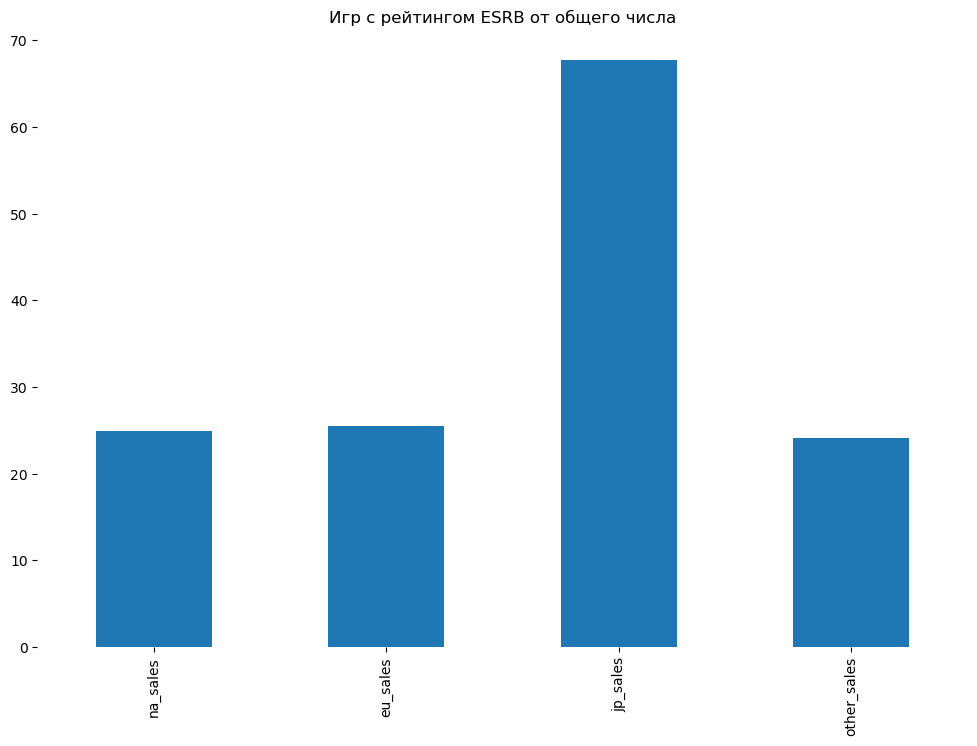

In [49]:
how_many_unknown = table_rating.T
how_many_unknown['percent'] = (how_many_unknown['Unknown']/how_many_unknown.iloc[:, 1:5].sum(axis=1))*100
how_many_unknown['percent'].plot(kind='bar', title='Игр с рейтингом ESRB от общего числа')
plt.box(False)
plt.show()

Наблюдение: среди игр, продающихся на японском рынке, непропорционально много игр с отсутствующим рейтингом ESRB. Посмотрим, связано ли это как-то с отличиями в популярности платформ.

#### Посмотрим статистику по платформам

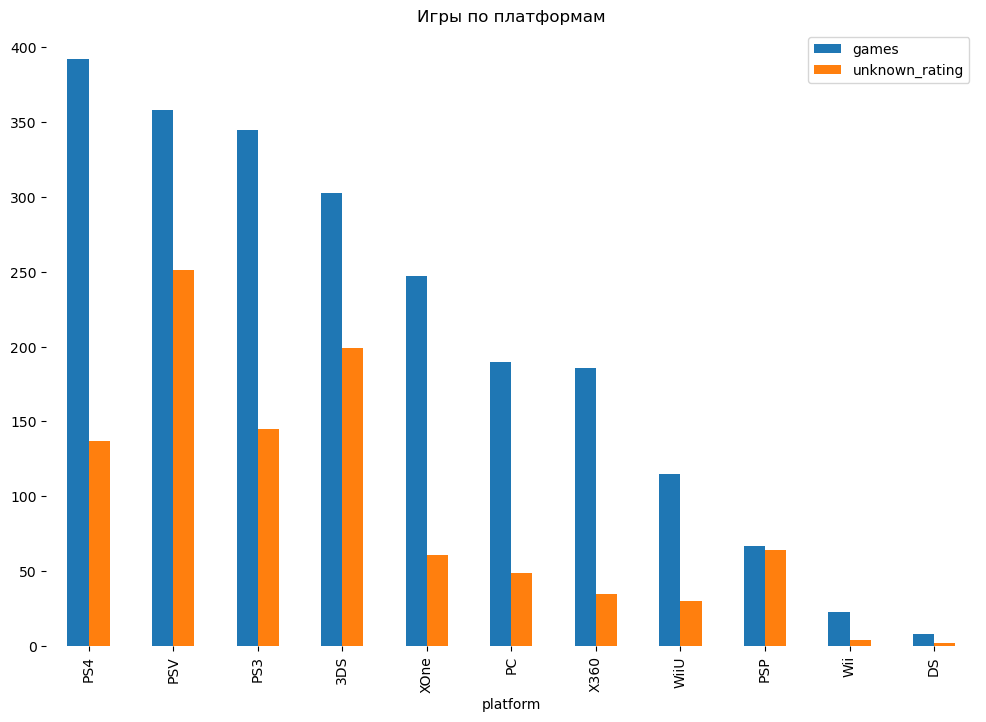

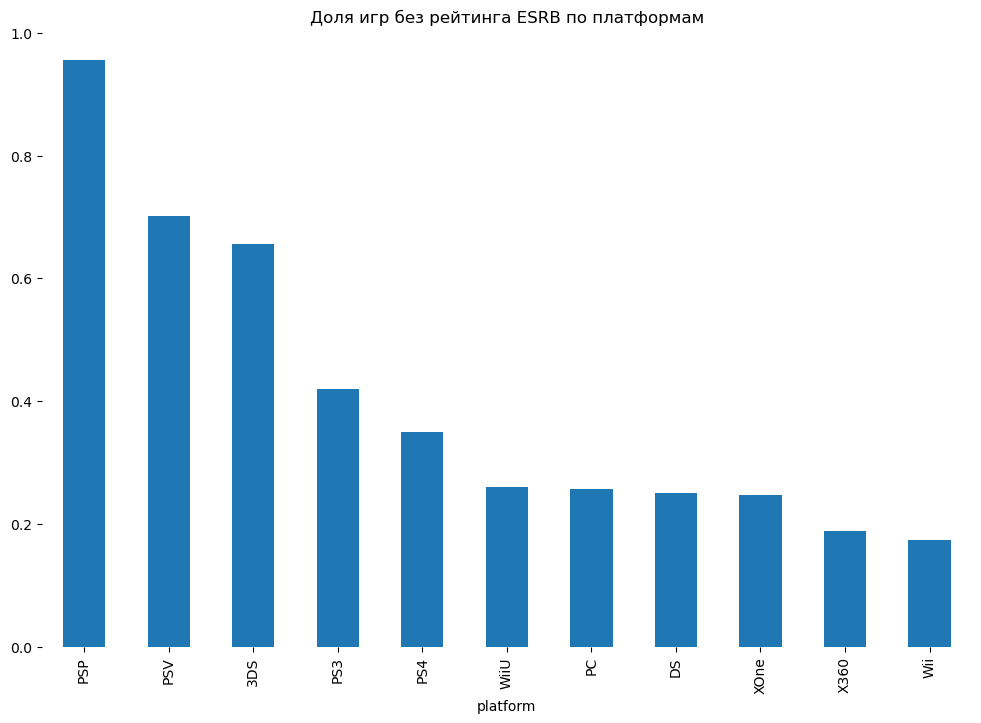

In [50]:
count_by_platform = pd.pivot_table(actual_data, index=['platform'], aggfunc='count').iloc[:,-1]
count_by_platform = pd.DataFrame(count_by_platform)
count_by_platform.columns=['games']

unknown_count = {}
for platform in actual_data['platform'].unique().tolist():
    unknown_count[platform] = actual_data.loc[(actual_data['platform'] == platform) & (actual_data['rating'] == 'Unknown')].shape[0]
unknown_count = pd.DataFrame.from_dict(unknown_count, orient='index', columns=['unknown_rating'])
unknown_count.index.name = 'platform'

count_by_platform = count_by_platform.join(unknown_count)
count_by_platform['part'] = count_by_platform['unknown_rating']/count_by_platform['games']
count_by_platform[['games', 'unknown_rating']].sort_values(by='games', ascending=False).plot(kind='bar', title='Игры по платформам')
plt.box(False)
plt.show()

count_by_platform['part'].sort_values(ascending=False).plot(kind='bar', title='Доля игр без рейтинга ESRB по платформам')
plt.box(False)
plt.show()

Как уже было выяснено ранее, в топ-3 наиболее популярных платформ на японском рынке находятся платформы 3DS и PSV, которых нет в топах других регионов. При этои именно для игр под эти платформы чаще всего отсутствует рейтинг ESRB, что и объясняет такую аномально высокую популярность игр без рейтинга ESRB на японском рынке.

# Статистический анализ

#### Гипотеза: средние пользовательские оценки платформ Xbox One и PC одинаковые

* Нулевая гипотеза H₀: пользовательские оценки (user_score) платформы (platform) Xbox One = пользовательские оценки (user_score) платформы (platform) PC
* Альтернативная гипотеза H₁: пользовательские оценки (user_score) платформы (platform) Xbox One ≠ пользовательские оценки (user_score) платформы (platform) PC

Принятый уровень статистической значимости: 5%

In [51]:
alpha = .05

In [52]:
actual_data['platform'].value_counts()

PS4     392
PSV     358
PS3     345
3DS     303
XOne    247
PC      190
X360    186
WiiU    115
PSP      67
Wii      23
DS        8
Name: platform, dtype: int64

In [53]:
sample_1 = actual_data.loc[actual_data['platform'] == 'XOne']['user_score'].dropna().to_list()
sample_2 = actual_data.loc[actual_data['platform'] == 'PC']['user_score'].dropna().to_list()

results = st.ttest_ind(sample_1, sample_2, equal_var=False)
print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу ')
else:
    print('Не получилось отвергнуть нулевую гипотезу ')

p-значение:  0.20707230217077913
Не получилось отвергнуть нулевую гипотезу 


#### Гипотеза: средние пользовательские оценки жанров Action и Sports одинаковые

* Нулевая гипотеза H₀: пользовательские оценки (user_score) для игр жанра (genre) Action = пользовательские оценки (user_score) для игр жанра (genre) Sports
* Альтернативная гипотеза H₁: пользовательские оценки (user_score) для игр жанра (genre) Action ≠ пользовательские оценки (user_score) для игр жанра (genre) Sports

In [54]:
sample_1 = actual_data.loc[actual_data['genre'] == 'Action']['user_score'].dropna().to_list()
sample_2 = actual_data.loc[actual_data['genre'] == 'Sports']['user_score'].dropna().to_list()

results = st.ttest_ind(sample_1, sample_2, equal_var=False)
print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу ')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение:  8.615399780015811e-14
Отвергаем нулевую гипотезу 


# 5. Сводные выводы

* Рассвет игровой индустрии приходится на конец 90-х - нулевые года, где происходил бурный рост производства новых игр вплоть до пиковых значений 2008-2009 гг, где выпускалось свыше 1400 игр ежегодно.
* После 2009 г. наблюдается спад выпуска новых игр. Вероятно, это может быть связано с развитием производительности консолей и ПК, в следствие чего производители игр стали активнее конкурировать в сегменте более качественных и дорогих игр вместо выпуска большого числа дешевых продуктов под устаревшие платформы.
* Снижение объемов выпуска игр продолжается вплоть до 2013 г., где уравновешивается в диапазоне 500-600 новых игр ежегодно. В связи с этим период 2013-2016 гг. выбран в качестве наиболее актуального и весь дальнейший анализ проводился именно на этой части исходного датасета.
* В актуальный период по объемам продаж доминируют игры для платформ PS4 и XOne. Продажи по ним растут, в то время как продажи игр для лидировавших ранее платформ PS3 и X360 сокращаются. Доля продаж для PC и WiiU  при этом невелика, но относительно стабильна.
* Заметны очень большие выбросы в зоне больших объемов продаж отдельных игр для платформы 3DS. Похожие выбросы есть и для платформ PS4 и X360. Вероятно, там выходили какие-то шедевры, которые все охотно покупали.
* Если смотреть на графики распределения оценок пользователей от общих продаж, то в целом заметно, что хорошо продающиеся игры обычно имеют более успешные оценки, а плохо продающиеся игры могут иметь очень плохие оценки и от пользователей и от критиков.
* Установлено, что критики довольно редко ставят низкие оценки коммерчески успешным играм, а то время как для пользователей это куда более частая история. Корреляция между продажами и оценкой критиков обычно выше чем корреляция между продажами и оценкой пользователей. Особенно для наболее популярных платформ (PS4 и XOne).
* Компания Take-two Interactive находится лишь на 8 месте по количеству выпущенных игр, но именно они в актуальном периоде выпустили самые продаваемые в мире продукты. К тому же их хиты лучше других оцениваются критиками.
* Большая часть коммерчески успешных игр от компании Nintendo имеет очень высокие оценки пользователей. В то же время наиболее коммерчески успешным играм от Electronic Arts пользователи ставят весьма посредственные оценки. Activision и вовсе умеет выпускать такие игры, которые пользователи с удовольствием покупают, но очень не любят - парадокс.
* Больше всех игр в период 2013-2016 гг. издала компания Namco Bandai Games, но хитов среди них почти нет.
* Наиболее прибыльными жанрами в целом являются жанры Shooter, Sports, Platform. Наименее прибыльными: Adventure, Strategy, Puzzle
* В Северной Америке, Европе и остальном мире за исключением Японии доминирует платформа PS4 и очень люят играть в жанры Action, Shooter, а также Sports
* На Японском рынке при этом доминирует платформа 3DS, а основные жанры - это Role-Playing, Action, Misc
* Также во всем мире больше всего игр продается с рейтингом M, а в Японии - без рейтинга. Любовь японцев к играм без рейтинга объясняется тем, что он редко присваиваться играм на платформах 3DS и PSV, которые очень популярны в Японии. Еще в Японии больше чем в других странах любят игры с рейтингом T. Похоже, там как нигде в мире популярные детские ролевые игры.
* Пользовательские оценки (user_score) платформы (platform) Xbox One оказались идентичны пользовательским оценкам (user_score) платформы (platform) PC даже при 5%-ом пороговом значении уровня статистической значимости.
* Пользовательские оценки (user_score) для игр жанра (genre) Action точно нельзя признать равными пользовательскии оценкам (user_score) для игр жанра (genre) Sports при 5%-ом пороговом значении уровня статистической значимости.